In [3]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from textblob import TextBlob

In [3]:
file_path = "D://My Folder//Forage//British Airways//BA_cleaned_reviews.csv"  
df = pd.read_csv(file_path)

In [4]:
def analyze_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    
    # Get the sentiment polarity (-1.0 = negative, 1.0 = positive)
    polarity = blob.sentiment.polarity
    
    # Classify sentiment based on polarity
    if polarity > 0:
        sentiment = "Positive"
    elif polarity < 0:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    
    return polarity, sentiment

In [5]:
# Apply sentiment analysis to the cleaned review column

df[['polarity', 'sentiment']] = df['cleaned_reviews'].apply(lambda x: pd.Series(analyze_sentiment(x)))

In [6]:
df[['cleaned_reviews', 'polarity', 'sentiment']].head()

,cleaned_reviews,polarity,sentiment
0,verified worst airline ever flown cancelled fl...,-0.073737,Negative
1,trip verified disappointing service plane inte...,-0.063879,Negative
2,trip verified transit visa required partner tr...,-0.016667,Negative
3,trip verified surprised receive confirmation p...,0.116667,Positive
4,trip verified flight cancelled refunding money...,0.136364,Positive


In [7]:
df.to_csv('D://My Folder//Forage//British Airways//BA_sentiment_reviews.csv', index=False)

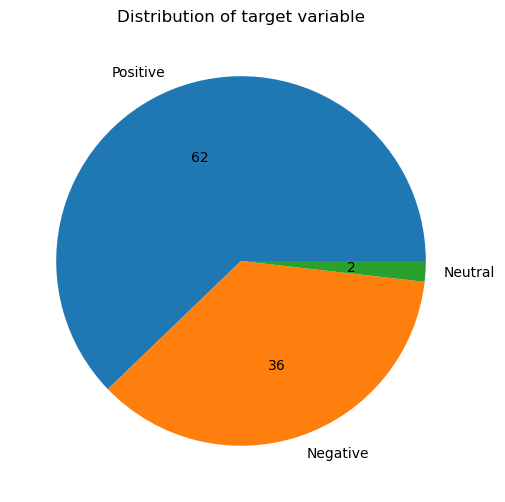

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.pie(df.sentiment.value_counts(),labels=["Positive","Negative","Neutral"],autopct="%.f")
plt.title("Distribution of target variable")
plt.show()